In [1]:
!git clone https://github.com/prajnasb/observations

Cloning into 'observations'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 1638 (delta 9), reused 0 (delta 0), pack-reused 1604
Receiving objects: 100% (1638/1638), 75.94 MiB | 31.71 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dense, GlobalAveragePooling2D

from keras.models import Sequential, load_model, Model
from keras.applications.mobilenet import MobileNet


from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split

In [0]:
model = Sequential()
mobilenet = MobileNet()

for layer in range(len(mobilenet.layers)-1):
    model.add(mobilenet.layers[layer])

for layer in model.layers[:-9]:
    layer.trainable = False

model.add(Dense(2, activation = 'softmax'))

model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
mobilenet = MobileNet(include_top = False)
x = mobilenet.output

x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)

preds = Dense(2,activation='softmax')(x)

model = Model(inputs = mobilenet.input, outputs=preds)

for layer in model.layers[:-9]:
    layer.trainable = False

model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
model.save('mdl.h5')
mdl = load_model('mdl.h5')

In [0]:
model.summary()

In [0]:
for l in model.layers:
    print(l,'\t\t',l.trainable)

In [0]:
mobilenet.summary()

In [0]:
os.listdir('/content/observations/experiements/data/with_mask')

X = []
y = []
for i in os.listdir('/content/observations/experiements/data/with_mask'):
    img = load_img('/content/observations/experiements/data/with_mask/'+str(i), target_size = (224,224))
    img = img_to_array(img)
    img = preprocess_input(img)
    X.append(img)
    y.append([1,0])

for i in os.listdir('/content/observations/experiements/data/without_mask'):
    img = load_img('/content/observations/experiements/data/without_mask/'+str(i), target_size = (224,224))
    img = img_to_array(img)
    img = preprocess_input(img)
    X.append(img)
    y.append([0,1])

data = np.array(X)
labels = np.array(y)

In [0]:
(trainX, testX, trainY, testY) = train_test_split(data, labels)

In [95]:
model.compile(loss="binary_crossentropy", optimizer = 'adam', metrics=["accuracy"])

H = model.fit( trainX, trainY, epochs = 15, batch_size = 32, validation_split = 0.1)

Train on 928 samples, validate on 104 samples
Epoch 1/15
928/928 [==============================] - 5s 6ms/step - loss: 0.2282 - accuracy: 0.9375 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/15
928/928 [==============================] - 4s 4ms/step - loss: 0.0334 - accuracy: 0.9914 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 3/15
928/928 [==============================] - 4s 4ms/step - loss: 0.0104 - accuracy: 0.9957 - val_loss: 1.9610e-04 - val_accuracy: 1.0000
Epoch 4/15
928/928 [==============================] - 4s 4ms/step - loss: 0.0059 - accuracy: 0.9978 - val_loss: 4.2351e-05 - val_accuracy: 1.0000
Epoch 5/15
928/928 [==============================] - 4s 4ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/15
928/928 [==============================] - 4s 4ms/step - loss: 0.0116 - accuracy: 0.9978 - val_loss: 8.1782e-04 - val_accuracy: 1.0000
Epoch 7/15
928/928 [==============================] - 4s 4ms/step - loss: 0.0016 - accurac

In [96]:
model.evaluate(testX , testY)

344/344 [==============================] - 1s 4ms/step


[0.056253455844620645, 0.9941860437393188]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0., 1.]], dtype=float32)

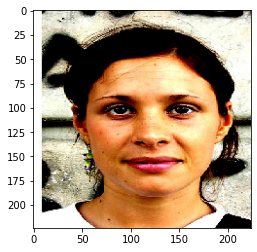

In [0]:
img = load_img('/content/observations/experiements/data/without_mask/376.jpg', target_size = (224,224))
img = img_to_array(img)
img = preprocess_input(img)
plt.imshow(img)

img = np.expand_dims(img, axis = 0)
model.predict(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[1., 0.]], dtype=float32)

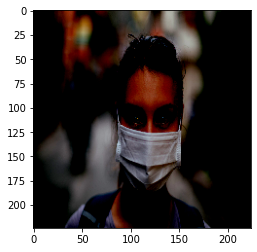

In [0]:
img = load_img('mask.jpg', target_size = (224,224))
img = img_to_array(img)
img = preprocess_input(img)
plt.imshow(img)

img = np.expand_dims(img, axis = 0)

model.predict(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0., 1.]], dtype=float32)

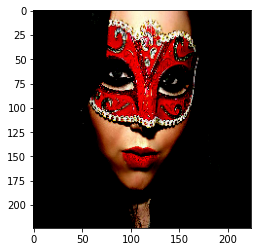

In [0]:
img = load_img('mask1.jpg', target_size = (224,224))
img = img_to_array(img)
img = preprocess_input(img)
plt.imshow(img)

img = np.expand_dims(img, axis = 0)

model.predict(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[0.99837816, 0.00162187]], dtype=float32)

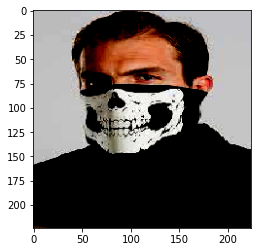

In [0]:
img = load_img('mask3.jpeg', target_size = (224,224))
img = img_to_array(img)
img = preprocess_input(img)
plt.imshow(img)

img = np.expand_dims(img, axis = 0)

model.predict(img)

In [0]:
os.listdir('/content/observations/experiements/data/without_mask/')[0]

'376.jpg'

In [0]:
model.save('MaskNet.hdf5')